This code implements a 2x5 layers fully connected autoencoder

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

Load the dataset but limit its size to run in short time...

In [50]:

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Use only 10% of the dataset
x_train = x_train[:6000]
x_test = x_test[:1000]

We can flatten the 2D image structures since we are implementing a fully connected network

In [51]:

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [52]:
print(x_train.shape)
print(x_test.shape)

(6000, 784)
(1000, 784)


The training set is cut into training and validation

In [53]:
# Split validation set
x_val = x_train[-1000:]
x_train = x_train[:-1000]
print(x_val.shape)
print(x_train.shape)
# Print the size of the training and validation sets
print("Training samples:", len(x_train))
print("Validation samples:", len(x_val))

(1000, 784)
(5000, 784)
Training samples: 5000
Validation samples: 1000


Now define the neural network

In [54]:
# Define autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

Create the model itself

In [55]:

# Define autoencoder model
autoencoder = Model(input_img, decoded)

autoencoder.summary()

# Compile autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_30 (Dense)            (None, 256)               200960    
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 16)                528       
                                                                 
 dense_35 (Dense)            (None, 32)                544 

Give the params of training and start it

In [56]:
# Train autoencoder model
history = autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/30
20/20 [==============================] - 4s 55ms/step - loss: 0.5161 - val_loss: 0.3005
Epoch 2/30
20/20 [==============================] - 1s 41ms/step - loss: 0.2831 - val_loss: 0.2744
Epoch 3/30
20/20 [==============================] - 1s 40ms/step - loss: 0.2650 - val_loss: 0.2659
Epoch 4/30
20/20 [==============================] - 1s 42ms/step - loss: 0.2596 - val_loss: 0.2620
Epoch 5/30
20/20 [==============================] - 1s 40ms/step - loss: 0.2566 - val_loss: 0.2598
Epoch 6/30
20/20 [==============================] - 1s 39ms/step - loss: 0.2542 - val_loss: 0.2560
Epoch 7/30
20/20 [==============================] - 1s 28ms/step - loss: 0.2498 - val_loss: 0.2507
Epoch 8/30
20/20 [==============================] - 1s 26ms/step - loss: 0.2430 - val_loss: 0.2448
Epoch 9/30
20/20 [==============================] - 0s 25ms/step - loss: 0.2381 - val_loss: 0.2405
Epoch 10/30
20/20 [==============================] - 1s 27ms/step - loss: 0.2353 - val_loss: 0.2380
Epoch 11/

Print the average loss on the validation set

In [57]:

# Evaluate validation set
loss = autoencoder.evaluate(x_val, x_val)
print('Validation Loss:', loss)

32/32 [==============================] - 0s 5ms/step - loss: 0.1738
Validation Loss: 0.17383401095867157


Plot the learning curves

dict_keys(['loss', 'val_loss'])


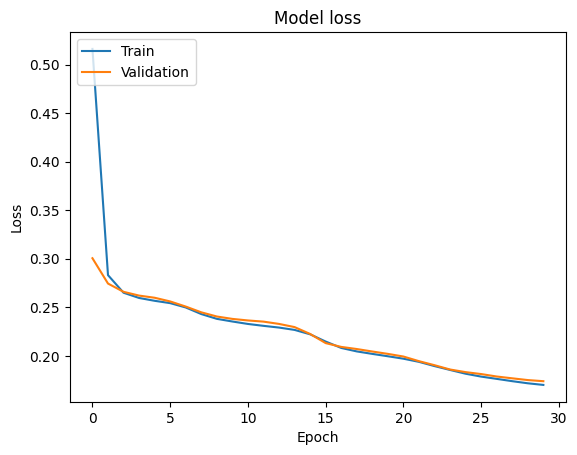

In [58]:

#Print history loss
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


32/32 [==============================] - 0s 3ms/step


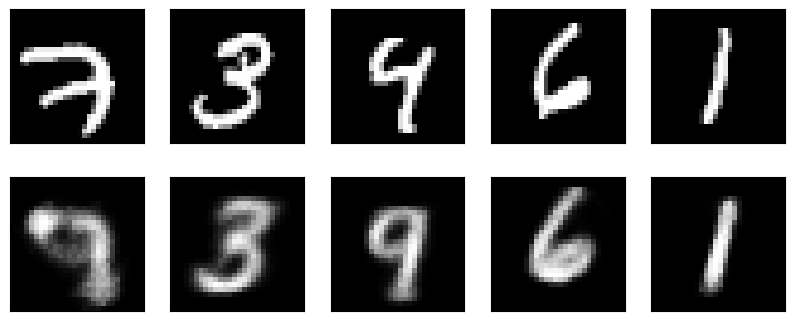

In [60]:
# Plot 5 reconstructed images
decoded_imgs = autoencoder.predict(x_val)
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()